# groupby的应用--计数，排序，去重，多列以及序列与数据的运算

* 有关目录拷贝问题

In [10]:
import numpy as np
import pandas as pd

In [18]:
r1=pd.read_csv(r"D:\t_alibaba_data3.txt",names=["user","brand","behavr","date"],sep="\t")
r1.head()

,user,brand,behavr,date
0,10944750,13451,0,06/04
1,10944750,13451,2,06/04
2,10944750,13451,2,06/04
3,10944750,13451,0,06/04
4,10944750,13451,0,06/04


## 计数

* len
* count
* size

In [12]:
len(r1)#整个数据长度

182880

In [13]:
r1.count()

user      182880
brand     182880
behavr    182880
date      182880
dtype: int64

C:\Users\wp\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

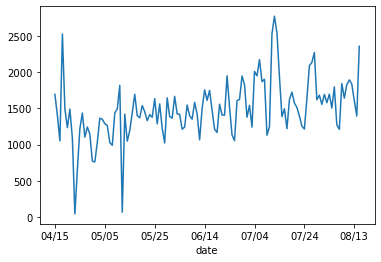

In [16]:
r1.groupby("date").size().plot()#size计数只能用户groupby,注意groupby会对索引自动排序

## 排序与groupby

In [32]:
r1.groupby("user").size().sort_values(ascending=False).head(10)#获取记录数排名前十的用户

user
2940000     2407
4184250     1473
3031750     1343
6874250     1275
12215000    1258
8040000     1232
8845250     1202
2891500     1178
5780000     1164
7699500     1093
dtype: int64

## classwork1

In [26]:
#品牌13451的总浏览量是多少？


12

In [25]:
#品牌13451的转化率是多少？


0.08333333333333333

C:\Users\wp\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

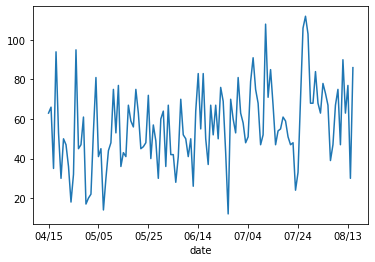

In [27]:
# 求每天的购买量并作图



In [36]:
#请输出购买量最大的前10个品牌


brand
7868     124
2683      86
11196     68
27791     58
8689      43
14020     42
14261     40
905       40
3228      38
18024     36
dtype: int64

## 去重

set or groupby

,user,brand,behavr,date
0,10944750,13451,0,06/04
1,10944750,13451,2,06/04
2,10944750,13451,2,06/04
3,10944750,13451,0,06/04
4,10944750,13451,0,06/04


In [7]:
len(set(r1.user.values))

884

In [9]:
len(r1.groupby("user").size())

884

## 多列groupby

In [53]:
#用户对品牌的购买次数最多的10对
r1[r1.behavr==1].groupby(["user","brand"]).size().sort_values().tail(10)

user      brand
3404000   22246    17
8216500   22552    17
8730250   911      17
8845250   22484    18
10261750  14261    19
6874250   15584    20
          2683     22
711500    26722    23
5812000   2683     31
3404000   905      40
dtype: int64

## classwork2

In [ ]:
# 有多少人购买过品牌7868？

In [47]:
len(set(r1[r1.behavr==1&(r1.brand==7868)].user))

34

In [ ]:
# 有多少人浏览过品牌7868？

In [48]:
len(set(r1[(r1.behavr==0)&(r1.brand==7868)].user))

297

In [50]:
#哪些人浏览了此品牌没购买？
print(set(r1[(r1.behavr==0)&(r1.brand==7868)].user)-set(r1[(r1.behavr==1)&(r1.brand==7868)].user))

{1792000, 981000, 341000, 7306250, 725000, 1727500, 5034000, 3114000, 7060500, 4809750, 9215000, 8628250, 393250, 8051750, 7699500, 19500, 10312750, 3304500, 317500, 2088000, 1832000, 1629250, 9671750, 2557000, 8573000, 10578000, 10119250, 2492500, 2940000, 3249250, 2331750, 12016750, 3035250, 5264500, 3216500, 9979000, 7600250, 9839750, 10393750, 7918750, 12377250, 5187750, 8163500, 8216750, 2232500, 7715000, 3288250, 9720000, 11896000, 5293250, 6061250, 7703750, 10018000, 8033500, 10774750, 1206500, 9782500, 4257000, 10966250, 854250, 5440750, 9163000, 10443000, 8149250, 1855750, 1525000, 5012750, 9802000, 2921750, 5865750, 5108000, 4852000, 9513250, 5726500, 10185000, 382250, 691500, 563500, 11496750, 2920750, 2078000, 3742000, 6099250, 5256500, 11613500, 4370750, 5320000, 1074500, 9906500, 4658500, 5170500, 10322250, 3282250, 4625750, 10492250, 2076000, 6897000, 1446250, 4902250, 6619500, 4059500, 1531250, 6299000, 4922750, 12229000, 8111500, 2788750, 7450000, 12239250, 3588500, 11

In [57]:
# 单日某用户购买次数最多的top20发生在哪些天和哪些用户身上？
r1[r1.behavr==1].groupby(["user","date"]).size().sort_values(ascending=False).head(20)

user      date 
2975500   07/13    11
5440750   08/09    11
3404000   05/21    11
10054250  08/13    11
3913250   07/07    11
12173500  05/11    11
2704750   06/25    11
3742000   04/23    11
472000    08/13    12
12229000  07/27    12
7269250   05/28    12
5769750   05/04    12
4376250   06/23    12
1194750   04/22    13
2807500   06/07    13
11564250  07/10    14
6874250   04/16    15
8216500   07/11    16
8845250   07/17    19
3404000   04/26    44
dtype: int64

## series与dataframe的运算

* 数据框和序列的运算本质上是一种自动遍历，用来避免直接python循环的好方法

* 运算函数：sub;add;div

## 与常数的运算

In [57]:
a=pd.Series([2,1,4,5],index=["a","b","c","d"])
a

a    2
b    1
c    4
d    5
dtype: int64

In [15]:
#和数值进行运算完全遵守numpy类似的规则：就是逐个作用到每一个元素
a+3

a    5
b    4
c    7
d    8
dtype: int64

In [16]:
np.exp(a)#无论是内部函数

a      7.389056
b      2.718282
c     54.598150
d    148.413159
dtype: float64

In [60]:
a**2+6

a    10
b     7
c    22
d    31
dtype: int64

In [56]:
def w1(x):#还是自定义函数
    return x-9+2

print(w1(a))

a   -5
b   -6
c   -3
d   -2
dtype: int64


In [61]:
d=pd.DataFrame(np.random.randn(3,2),columns=["a","b"])
d

,a,b
0,-0.265667,-1.037581
1,-1.033648,0.443449
2,0.619189,1.741607


In [62]:
d-3

,a,b
0,-3.265667,-4.037581
1,-4.033648,-2.556551
2,-2.380811,-1.258393


In [63]:
d.sub(3)

,a,b
0,-3.265667,-4.037581
1,-4.033648,-2.556551
2,-2.380811,-1.258393


In [21]:
np.exp(d)

,a,b
0,1.405256,3.363054
1,2.375396,1.037718
2,4.253211,0.323050


In [22]:
print(w1(d))

          a         b
0 -6.659781 -5.787151
1 -6.134836 -6.962976
2 -5.552326 -8.129949


## 与序列以及数据框的运算（索引对齐）

In [73]:
a=pd.Series([2,1,4,5],index=["a","b","c","d"])
a

a    2
b    1
c    4
d    5
dtype: int64

In [74]:
a+a

a     4
b     2
c     8
d    10
dtype: int64

In [75]:
b=pd.Series([3,1,4,2,1],index=["a","b","c","j","p"])
b

a    3
b    1
c    4
j    2
p    1
dtype: int64

In [76]:
#索引会取并集，找不到相同索引匹配进行运算的则为nan
a+b

a    5.0
b    2.0
c    8.0
d    NaN
j    NaN
p    NaN
dtype: float64

In [31]:
#如果你希望缺失值用其他值来替代而不是空缺，则需要用函数来运算并加入fill_value参数
a.add(b,fill_value=0)
#上面没找到匹配值的时候则用0来替代
#注意加法运算之后数据类型都变为了float

a    5.0
b    2.0
c    8.0
d    5.0
j    2.0
p    1.0
dtype: float64

In [77]:
d=pd.DataFrame(np.random.randint(0,10,size=(3,2)),columns=["a","b"])
d

,a,b
0,3,3
1,8,4
2,0,2


In [78]:
c=pd.DataFrame(np.random.randint(0,10,size=(4,3)),columns=["a","b","c"])
c

,a,b,c
0,5,7,8
1,8,4,8
2,8,3,5
3,3,2,2


In [82]:
d.div(c,fill_value=2)

,a,b,c
0,0.600000,0.428571,0.25
1,1.000000,1.000000,0.25
2,0.000000,0.666667,0.40
3,0.666667,1.000000,1.00


## classwork3

* 求各个商品的购买量

In [69]:
g1=r1[r1.behavr==1].groupby("brand").size()
g1

* 求各个商品的浏览量

In [70]:
g2=r1[r1.behavr==0].groupby("brand").size()
g2

* 求各个商品的转化率（总购买比上总浏览）

In [77]:
a=g1.div(g2,fill_value=0)
a

brand
11       0.000000
15       0.000000
18       0.000000
19       0.500000
20       0.000000
22       0.030303
23       0.000000
26       0.000000
27       0.000000
29       0.142857
33       0.000000
38       0.000000
39       0.000000
43       0.125000
45       0.000000
53       0.000000
57       0.111111
58       0.000000
62       0.083333
72       0.000000
83       1.250000
90       0.000000
91       0.000000
103      0.000000
104      0.000000
111      0.000000
116      0.000000
119      0.000000
120      0.000000
121      0.000000
           ...   
29463    0.000000
29464    0.000000
29465    0.063492
29472    0.105263
29473    0.020408
29474    0.000000
29475    0.000000
29477    0.000000
29486    0.000000
29487    0.000000
29488    0.000000
29490    0.028169
29491    0.000000
29493    0.000000
29497    0.000000
29501    0.000000
29502    0.000000
29504    0.000000
29505    0.142857
29509    0.000000
29524    0.000000
29528    0.000000
29529    0.000000
29531    0.000000
2953

* 转化率最高的30个商品及其转化率

In [82]:
a.sort_values(ascending=False).head(30)

brand
16602         inf
27653         inf
28617         inf
526           inf
12018         inf
25349         inf
24819         inf
15959         inf
2291          inf
24434         inf
13017         inf
18124         inf
23342         inf
3051          inf
22306         inf
14174    5.000000
2208     5.000000
10690    3.000000
948      2.000000
17977    2.000000
6757     2.000000
25333    1.500000
2437     1.333333
83       1.250000
26168    1.222222
10308    1.200000
15828    1.000000
18542    1.000000
5478     1.000000
1704     1.000000
dtype: float64

* 求所有购买量大于20的各个商品的转化率(请自己百度去掉nan值的方法)

In [108]:
g1.r1[r1.behavr==1].groupby("brand").size()
g1[g1>20]

brand
554      0.117647
905      0.579710
911      0.043189
2257     0.017304
2367     0.105991
2683     0.077758
3228     0.030596
3627     0.035573
4949     0.022284
7105     0.032061
7868     0.038798
8637     0.079027
8689     0.043434
11080    0.016949
11196    0.032755
12168    0.044481
14020    0.036874
14261    0.032258
15019    0.090164
15584    0.053476
18024    0.093264
18805    0.039792
23779    0.111111
26288    0.095890
26722    0.020595
27117    0.283784
27791    0.073325
29099    0.050955
dtype: float64